10.0%. Run time:   0.28s. Est. time left: 00:00:00:02
20.0%. Run time:   0.46s. Est. time left: 00:00:00:01
30.0%. Run time:   0.66s. Est. time left: 00:00:00:01
40.0%. Run time:   0.85s. Est. time left: 00:00:00:01
50.1%. Run time:   1.05s. Est. time left: 00:00:00:01
60.1%. Run time:   1.23s. Est. time left: 00:00:00:00
70.1%. Run time:   1.54s. Est. time left: 00:00:00:00
80.1%. Run time:   1.95s. Est. time left: 00:00:00:00
90.1%. Run time:   2.33s. Est. time left: 00:00:00:00
100.0%. Run time:   2.68s. Est. time left: 00:00:00:00
Total run time:   2.68s


/home/mcditoos/anaconda3/envs/qutip/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


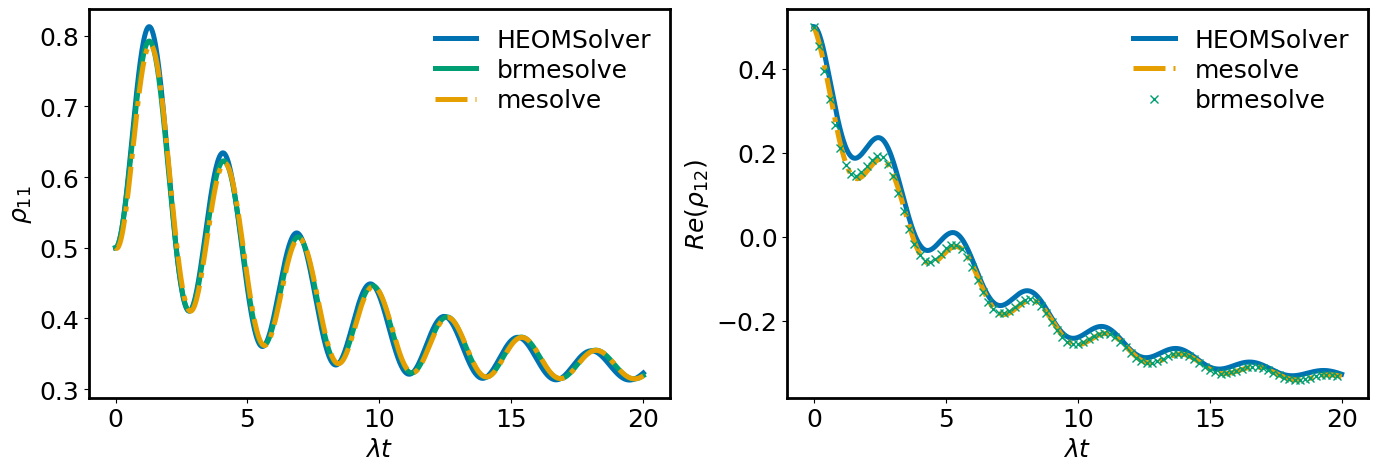

In [2]:
# ---IMPORT SECTION---
from mpl_setup import BLUE,ORANGE,GREEN,PURPLE,GRAY,SKY_BLUE,VERMILLION
from qutip import Qobj,sigmaz,sigmax,brmesolve,sigmay
from qutip import sigmam,sigmap,mesolve,expect,basis
import numpy as np
from qutip.solver.heom import HEOMSolver,UnderDampedBath

import matplotlib.pyplot as plt
import mpmath as mp
from environment import OhmicEnvironment,UnderDampedEnvironment,BosonicEnvironment
from environment import n_thermal
colors=[BLUE,ORANGE,GREEN,PURPLE,GRAY,SKY_BLUE,VERMILLION]
P11p = basis(2, 0) * basis(2, 0).dag()
P12p = basis(2, 0) * basis(2, 1).dag()

# -- FIRST EXAMPLE PARAMETERS --- 

lam = 0.5
w0 = 2
gamma = 3 
T = 0.5
t = np.linspace(0,40,1000)
rho0 = 0.5 * Qobj([[1,1],[1,1]])
Hsys = sigmax()/2 +sigmaz()/2
Q = sigmaz()
env = UnderDampedEnvironment(lam=lam, gamma=gamma,T=T,w0=w0)
bath=UnderDampedBath(Q=Q,lam=lam, gamma=gamma,T=T,w0=w0,Nk=5)

# -- SIMULATION --

# -- HEOM --
solver = HEOMSolver(Hsys, bath, max_depth=6)
result_h = solver.run(rho0, t)
# APPROPIATE JUMP OPS IN THIS CASE
sp=Qobj([[0.4,0.2472],[-0.6472,-0.4]])
sm=sp.dag()
sz=Qobj([[0.2,0.4],[0.4,-0.2]])
# -- LINDBLAD --
c_ops=[np.sqrt(env.power_spectrum(1.118))*sp,np.sqrt(env.power_spectrum(-1.118))*sm,np.sqrt(env.power_spectrum(0))*sz]
result_lindblad = mesolve(Hsys, rho0, t, c_ops)
def nth(w):
    if T> 0:
        return 1 / (np.exp(w / T) - 1)
    else:
        return 0
def power_spectrum(w):
    if w > 0:
        return env.power_spectrum(w)
    elif w == 0:
        return 0
    else:
        return env.power_spectrum(-w)

# -- BLOCH-REDFIELD --
a_ops=[[Q, lambda w: env.power_spectrum(w).item()]]
resultBR = brmesolve(Hsys, rho0, t, a_ops=a_ops,sec_cutoff=-1)



# -- DYNAMICS SIMULATION --
fig, ax = plt.subplots(1, 2, figsize=(13.6, 4.54))
ax[0].plot(lam*t,expect(P11p,result_h.states),color=colors[0],label='HEOMSolver')
ax[0].plot(lam*t,expect(P11p,resultBR.states),color=colors[2],label='brmesolve')
ax[0].plot(lam*t,expect(P11p,result_lindblad.states),'-.',color=colors[1],label='mesolve')
ax[0].set_ylabel(r"$\rho_{11}$")
ax[0].set_xlabel(r"$\lambda t$")
ax[0].legend()
ax[1].plot(lam*t,expect(sigmap(),result_h.states),color=colors[0],label='HEOMSolver')
ax[1].plot(lam*t,expect(sigmap(),result_lindblad.states),'-.',color=colors[1],label='mesolve')
ax[1].plot(lam*t,expect(sigmap(),resultBR.states),'x',color=colors[2],label='brmesolve',markevery=10)

ax[1].set_ylabel(r"$Re(\rho_{12})$")
ax[1].set_xlabel(r"$\lambda t$")
ax[1].legend()
plt.savefig('./heom_qubit_underdamped.pdf')


/home/mcditoos/anaconda3/envs/qutip/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


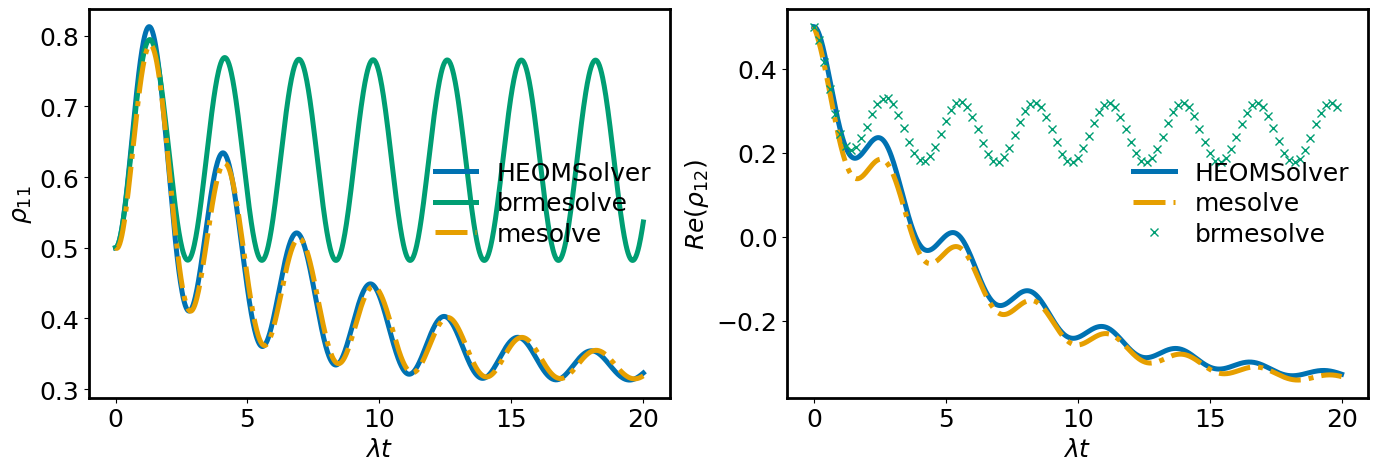

In [2]:
# -- BLOCH-REDFIELD --
a_ops=[[Q, lambda x: env.power_spectrum(x).item()]]
resultBR = brmesolve(Hsys, rho0, t, a_ops=a_ops,sec_cutoff=-1)



# -- DYNAMICS SIMULATION --
fig, ax = plt.subplots(1, 2, figsize=(13.6, 4.54))
ax[0].plot(lam*t,expect(P11p,result_h.states),color=colors[0],label='HEOMSolver')
ax[0].plot(lam*t,expect(P11p,resultBR.states),color=colors[2],label='brmesolve')
ax[0].plot(lam*t,expect(P11p,result_lindblad.states),'-.',color=colors[1],label='mesolve')
ax[0].set_ylabel(r"$\rho_{11}$")
ax[0].set_xlabel(r"$\lambda t$")
ax[0].legend()
ax[1].plot(lam*t,expect(sigmap(),result_h.states),color=colors[0],label='HEOMSolver')
ax[1].plot(lam*t,expect(sigmap(),result_lindblad.states),'-.',color=colors[1],label='mesolve')
ax[1].plot(lam*t,expect(sigmap(),resultBR.states),'x',color=colors[2],label='brmesolve',markevery=10)

ax[1].set_ylabel(r"$Re(\rho_{12})$")
ax[1].set_xlabel(r"$\lambda t$")
ax[1].legend()
plt.savefig('./heom_qubit_underdamped.pdf')

10.0%. Run time:   8.29s. Est. time left: 00:00:01:14
20.0%. Run time:  16.31s. Est. time left: 00:00:01:05
30.0%. Run time:  23.30s. Est. time left: 00:00:00:54
40.0%. Run time:  30.57s. Est. time left: 00:00:00:45
50.1%. Run time:  39.26s. Est. time left: 00:00:00:39
60.1%. Run time:  46.22s. Est. time left: 00:00:00:30
70.1%. Run time:  53.28s. Est. time left: 00:00:00:22
80.1%. Run time:  61.59s. Est. time left: 00:00:00:15
90.1%. Run time:  71.85s. Est. time left: 00:00:00:07
100.0%. Run time:  79.74s. Est. time left: 00:00:00:00
Total run time:  79.75s
10.0%. Run time:  13.30s. Est. time left: 00:00:01:59
20.0%. Run time:  25.89s. Est. time left: 00:00:01:43
30.0%. Run time:  38.80s. Est. time left: 00:00:01:30
40.0%. Run time:  51.13s. Est. time left: 00:00:01:16
50.1%. Run time:  63.30s. Est. time left: 00:00:01:03
60.1%. Run time:  88.88s. Est. time left: 00:00:00:59
70.1%. Run time: 108.72s. Est. time left: 00:00:00:46
80.1%. Run time: 124.26s. Est. time left: 00:00:00:30
90.

/home/mcditoos/anaconda3/envs/qutip/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


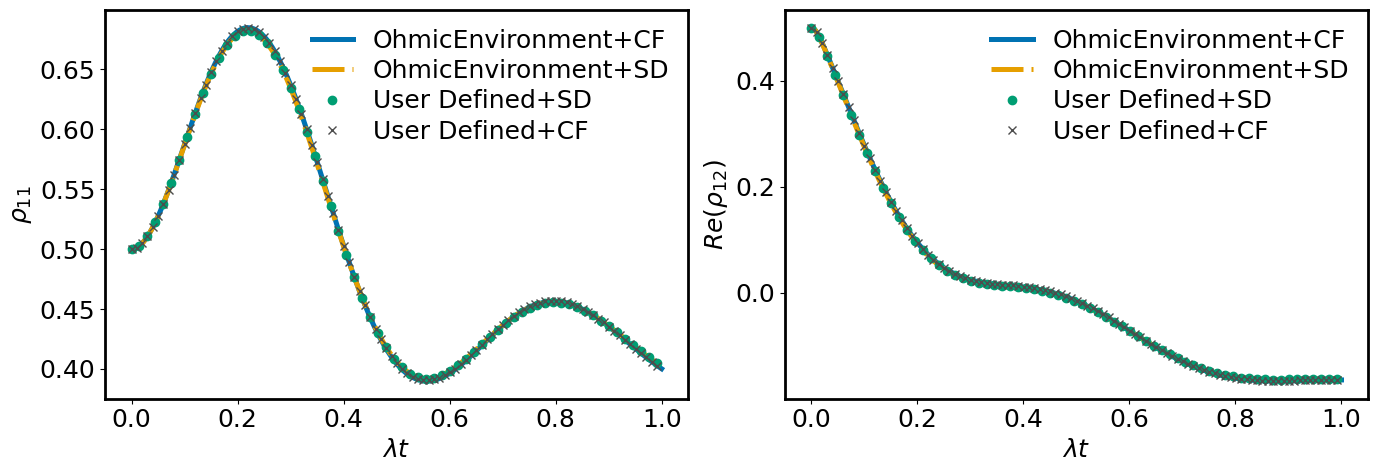

In [3]:
# -- SECOND EXAMPLE PARAMETERS --
lam=0.1
gamma=5
T=1

oh=OhmicEnvironment(T=T,alpha=lam,wc=gamma,s=1)

# --FITTING USING OHMIC CLASS--
w = np.linspace(0, 100, 2000)
env_fs,_=oh.approx_by_sd_fit(wlist=w,Nk=3,Nmax=8)
bath_fs=env_fs.to_bath(Q)

t=np.linspace(0,10,1000)
env_fc,_=oh.approx_by_cf_fit(tlist=t,Ni_max=5,Nr_max=4,target_rsme=None)
bath_fc=env_fc.to_bath(Q)

# -- USING A USER DEFINED ENVIRONMENT --
def J(w, lam=lam,gamma=gamma):
    """ 
    Ohmic spectral density
    """
    return lam*w*np.exp(-abs(w)/gamma)
user_env=BosonicEnvironment.from_spectral_density(J,T=T,wMax=60)

user_env_sd,_=user_env.approx_by_sd_fit(wlist=w,Nk=3,Nmax=8)
bath_env_sd=user_env_sd.to_bath(Q)
user_env_cf,_=user_env.approx_by_cf_fit(tlist=t,Ni_max=5,Nr_max=4)
bath_env_cf=user_env_cf.to_bath(Q)


# -- SOLVING DYNAMICS --
tlist = np.linspace(0, 10 , 1000)
HEOM_corr_fit = HEOMSolver(Hsys, bath_fc, max_depth=5)
result_corr=HEOM_corr_fit.run(rho0,tlist)

HEOM_spec_fit = HEOMSolver(Hsys, bath_fs, max_depth=5)
result_spec=HEOM_spec_fit.run(rho0,tlist)



HEOM_fos = HEOMSolver(Hsys, bath_env_sd, 
                      max_depth=5)
result_fos=HEOM_fos.run(rho0,tlist)

HEOM_foc = HEOMSolver(Hsys, bath_env_cf, 
                      max_depth=5)
result_foc=HEOM_foc.run(rho0,tlist)

# -- OHMIC BATH DYNAMICS -- 
fig, ax = plt.subplots(1, 2, figsize=(13.6, 4.54))
ax[0].plot(lam*t,expect(P11p,result_corr.states),color=colors[0],label='OhmicEnvironment+CF')
ax[0].plot(lam*t,expect(P11p,result_spec.states),"-.",color=colors[1],label='OhmicEnvironment+SD')
ax[0].plot(lam*t,expect(P11p,result_fos.states),'o',color=colors[2],label='User Defined+SD',markevery=15)
ax[0].plot(lam*t,expect(P11p,result_foc.states),'x',color=colors[4],label='User Defined+CF',markevery=10)
ax[0].set_ylabel(r"$\rho_{11}$")
ax[0].set_xlabel(r"$\lambda t$")
ax[0].legend()
ax[1].plot(lam*t,expect(P12p,result_corr.states),color=colors[0],label='OhmicEnvironment+CF')
ax[1].plot(lam*t,expect(P12p,result_spec.states),"-.",color=colors[1],label='OhmicEnvironment+SD')
ax[1].plot(lam*t,expect(P12p,result_fos.states),'o',color=colors[2],label='User Defined+SD',markevery=15)
ax[1].plot(lam*t,expect(P12p,result_foc.states),'x',color=colors[4],label='User Defined+CF',markevery=10)
ax[1].set_ylabel(r"$Re(\rho_{12})$")
ax[1].set_xlabel(r"$\lambda t$")
ax[1].legend()
plt.savefig('./heom_qubit_ohmic.pdf')


